In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 

## Problem 1
d)


In [18]:
X1 = 4
p = 0.01
b0 = -1.5
b1 = -0.7
b2 = -0.85

X2 = 1/b2*( np.log( p/(1-p) ) - b0 - b1*X1 )
print(f"X_2 = {X2:.2f}")

X_2 = 0.35


## Problem 2

In [2]:
Auto = pd.read_csv('Auto.csv', delimiter=',')

for col in Auto.columns[0:8]: #Looks in the first 8 columns and removes non-numeric values
    Auto = Auto[pd.to_numeric(Auto[col], errors='coerce').notnull()]
Auto["horsepower"] = Auto["horsepower"].astype(np.int64)

Auto = Auto.assign(mpg01 = [i > Auto["mpg"].median() for i in Auto["mpg"]])
# Auto.iloc[:0]

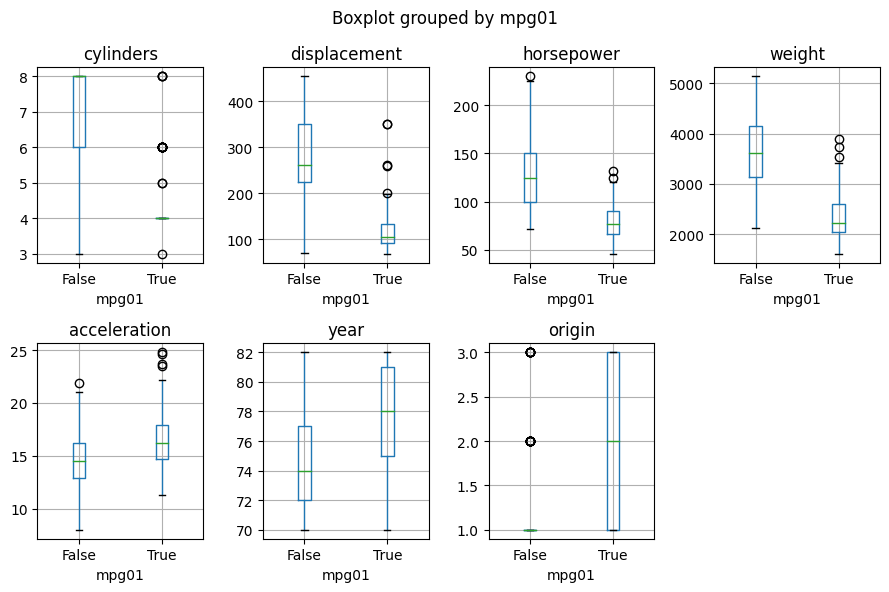

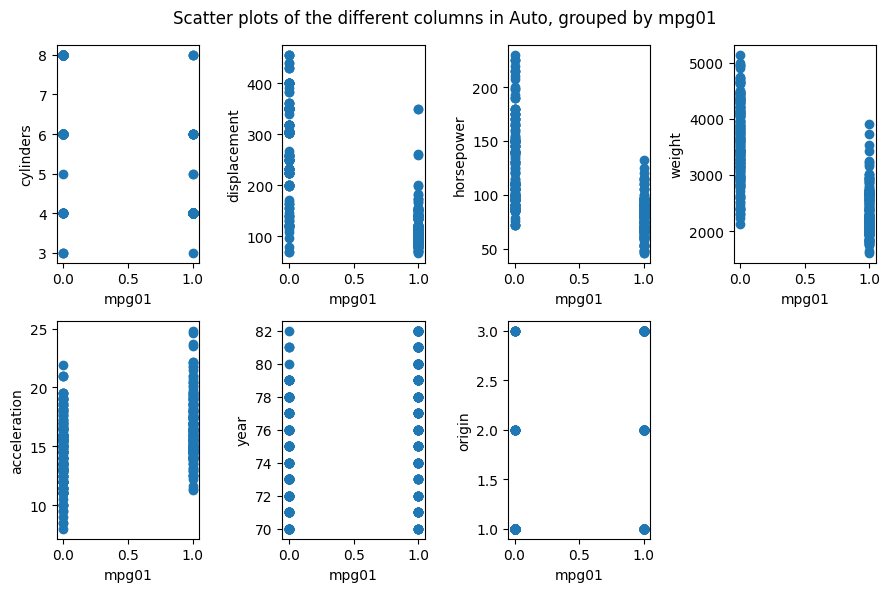

In [23]:
# scatter_matrix(Auto, figsize = [11, 10]);
# for col in ["cylinders",	"displacement",	"horsepower",	"weight",	"acceleration",	"year",	"origin"]:
#     Auto.boxplot(column = col, by = 'mpg01');

fig, axs = plt.subplots(2, 4, figsize = (9,6)) #Setting up the plot
fig.set_tight_layout(True)
fig.suptitle("Boxplots of the different columns in Auto, grouped by mpg01") #Title

columns = ["cylinders",	"displacement",	"horsepower",	"weight",	"acceleration",	"year",	"origin"]
counter = 0

for i in range(2): #Makes all the boxplots, iterating over the different columns
    for j in range(4):
        Auto.boxplot(column = columns[counter], by = 'mpg01', ax = axs[i,j])
        counter += 1
        if counter == len(columns): break
fig.delaxes(axs[1][3]) #7 is prime, had to remove last plot..
plt.show() 


fig, axs = plt.subplots(2, 4, figsize = (9,6)) #Setting up the plot
fig.set_tight_layout(True)
fig.suptitle("Scatter plots of the different columns in Auto, grouped by mpg01") #Title


columns = Auto.columns[1:8]
counter = 0
for i in range(2): #Makes all the scatter plots, iterating over the different columns
    for j in range(4):
        axs[i][j].scatter(Auto["mpg01"], Auto[columns[counter]])
        axs[i][j].set_xlabel("mpg01")
        axs[i][j].set_ylabel(columns[counter])
        counter += 1
        if counter == len(columns): break
fig.delaxes(axs[1][3]) #7 is prime, had to remove last plot..
plt.show() 

Everything except cylinders and origin seem useful. The most useful seem to be displacement, horsepower and weight.

In [8]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
train, test = train_test_split(Auto, test_size=0.2)

model = smf.glm(formula = "mpg01 ~ displacement + horsepower + weight", data = train, family = sm.families.Binomial())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['mpg01[False]', 'mpg01[True]']   No. Observations:                  313
Model:                                         GLM   Df Residuals:                      309
Model Family:                             Binomial   Df Model:                            3
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -87.518
Date:                             Wed, 16 Oct 2024   Deviance:                       175.04
Time:                                     17:22:14   Pearson chi2:                     486.
No. Iterations:                                  7   Pseudo R-squ. (CS):             0.5627
Covariance Type:                         nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]

Weight and maybe displacement are not statistically sicnificant. The intercept and horsepower are.

In [14]:
model2 = smf.glm(formula = "mpg01 ~ displacement", data = train, family = sm.families.Binomial())

# Fit the model
result2 = model2.fit()
# Display and interpret results
print(result2.summary())

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['mpg01[False]', 'mpg01[True]']   No. Observations:                  313
Model:                                         GLM   Df Residuals:                      311
Model Family:                             Binomial   Df Model:                            1
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -97.716
Date:                             Wed, 16 Oct 2024   Deviance:                       195.43
Time:                                     17:24:55   Pearson chi2:                     722.
No. Iterations:                                  7   Pseudo R-squ. (CS):             0.5332
Covariance Type:                         nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]

Now it is statistically very significant. This is due to the colinearity between the predictors.

## Problem 3
h)

In [20]:
b0 = -2.954
b1 = 6.732*10**(-1)
b2 = -3.695*10**(-5)
X1 = 1
X2 = 180

p = np.exp(b0 + b1*X1 + b2*X2)/( 1+np.exp(b0 + b1*X1 + b2*X2) )
print(f"p = {p:.2f}")

p = 0.09
